Problem Statement:

An FMCG brand X is available at a large number of stores. The brand is available as a basic version X and in the form of some value-added variants. The price of the brand X can vary from store to store depending on the discounts / promos that the store is offering. In some stores there are special displays for the brand X.

Weekly Sales of Brand X is given for 3238 stores

In addition to Sales, the following information are also given
	- Price: Avg price of Brand X in that store
	- Feature: Whether value-added variant of Brand X is present in the store (1) or not (0)
	- Display: Whether any store level promo of  Brand X is present in the store (1) or not (0)
	- Price-Competitors: Prices of 5 competition brands in the store have been given also.
    
Train-Test split :  70:30 
Create a model(using Training set) to predict future sales
Use this model to predict future sales (in Test set) and then compare the “Predicted Sales” with the “Actual Sales”


The model will be tested by evaluation metric 
Adjusted R-sq
Mean Absolute Error (MAE)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_excel(r'Rawdata_MMM.xls')

In [3]:
df.head()

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5
0,20,5.690,0,0,4.065,4.108,5.280,4.690,3.290
1,26,5.968,0,0,4.065,3.775,5.247,3.946,3.490
2,41,6.190,0,0,4.064,3.421,5.540,3.330,3.690
3,34,5.780,0,0,4.066,3.510,4.500,3.973,2.172
4,32,6.190,0,0,4.067,3.402,5.500,2.759,3.690


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales                 3238 non-null   int64  
 1   Price                 3238 non-null   float64
 2   Feature               3238 non-null   int64  
 3   Display               3238 non-null   int64  
 4   Price - Competitor 1  3238 non-null   float64
 5   Price - Competitor 2  3238 non-null   float64
 6   Price - Competitor 3  3238 non-null   float64
 7   Price - Competitor 4  3238 non-null   float64
 8   Price - Competitor 5  3238 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 227.8 KB


No null values

In [5]:
df.describe()

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5
count,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000
mean,79.677888,5.681580,0.169240,0.131254,4.066095,3.705841,5.619677,4.470330,2.965036
std,91.150090,0.569159,0.375022,0.337730,0.521656,0.466649,0.642104,0.670754,0.593215
min,2.000000,2.500000,0.000000,0.000000,2.030000,1.667000,2.500000,1.110000,0.820000
25%,33.000000,5.480000,0.000000,0.000000,3.626000,3.410250,5.061750,4.000000,2.500000
50%,54.000000,5.790000,0.000000,0.000000,3.975000,3.673000,5.832000,4.512500,3.090000
75%,88.000000,6.072500,0.000000,0.000000,4.598000,3.978750,5.990000,4.999000,3.490000
max,1145.000000,6.490000,1.000000,1.000000,4.928000,4.920000,7.490000,6.290000,3.950000


Text(0, 0.5, 'Sales')

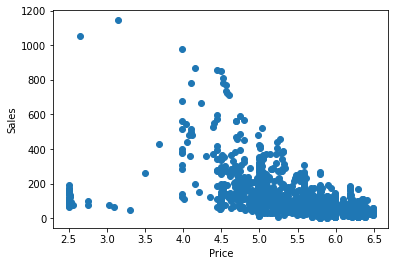

In [6]:
plt.scatter(df.Price,df.Sales)
plt.xlabel('Price')
plt.ylabel('Sales')

The datapoints are concentrated in the price(x- axis) region of 4.5 to 6.5 around 0-200 on y-axis

Text(0, 0.5, 'Sales')

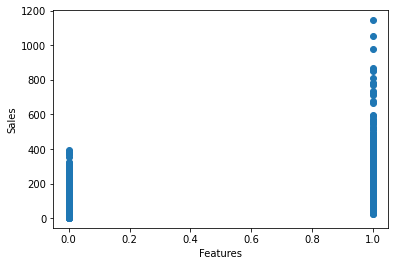

In [7]:
plt.scatter(df.Feature,df.Sales)
plt.xlabel('Features')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

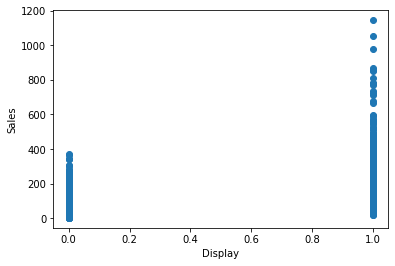

In [8]:
plt.scatter(df.Display,df.Sales)
plt.xlabel('Display')
plt.ylabel('Sales')

More sales happened for the value-added - variant featured of brand X. Same holds true when Brand X is having store level promo

TypeError: loop of ufunc does not support argument 0 of type AxesSubplot which has no callable rint method

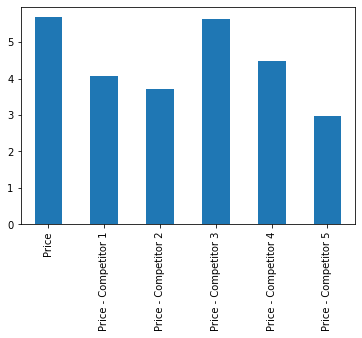

In [9]:
np.round(df[['Price','Price - Competitor 1','Price - Competitor 2','Price - Competitor 3','Price - Competitor 4','Price - Competitor 5']].mean().plot.bar())

Comparative study of mean price across competitors

<AxesSubplot:>

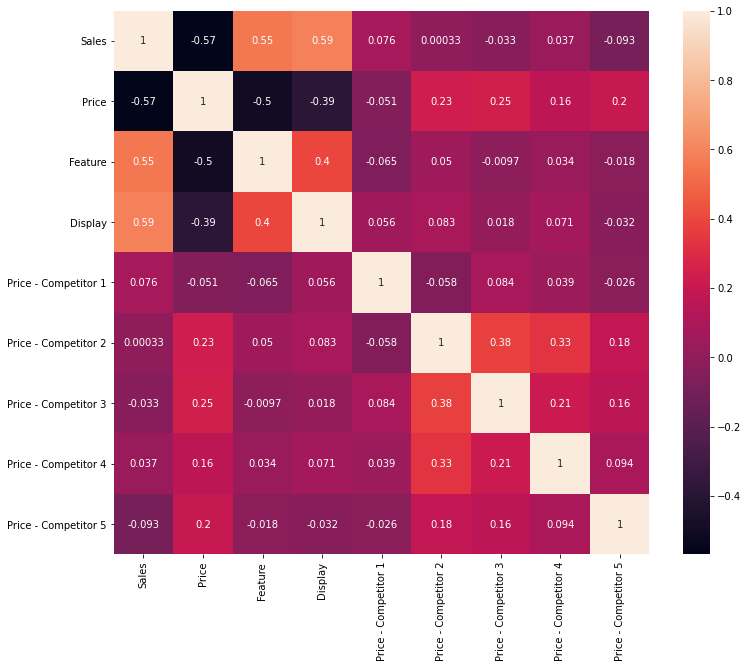

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

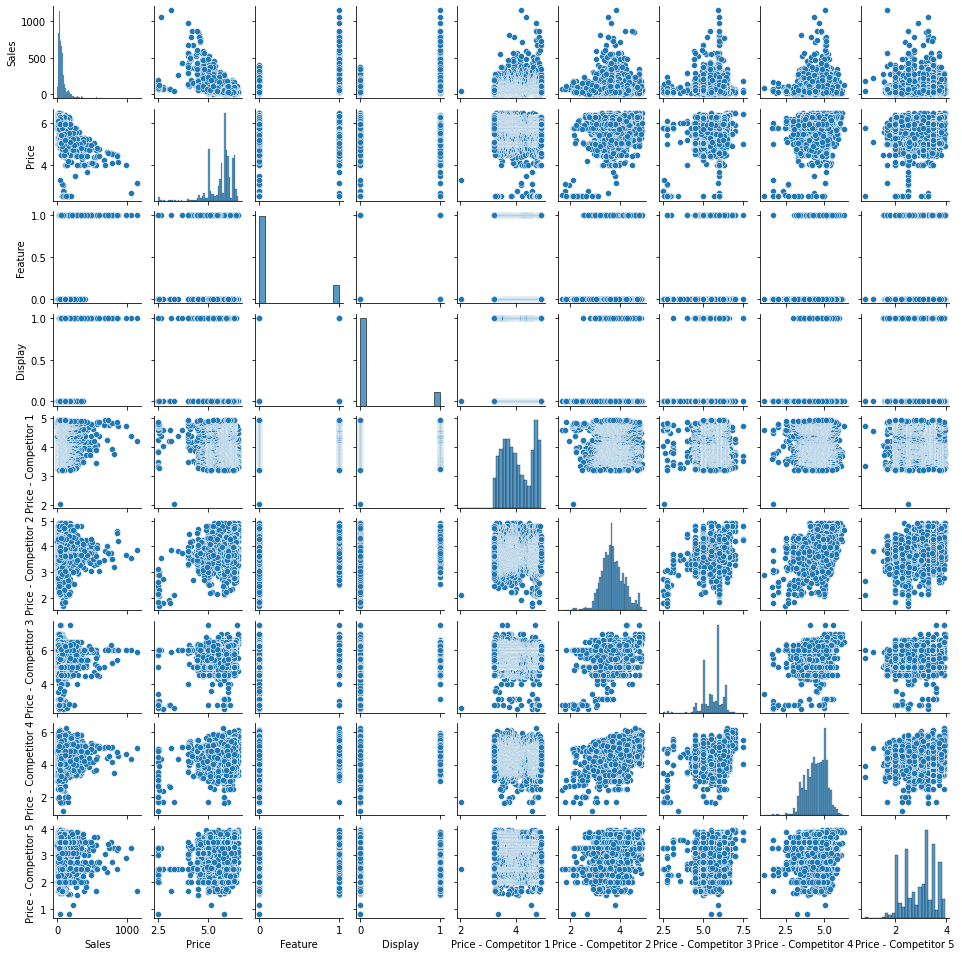

In [11]:
sns.pairplot(df, height=1.5)

In [12]:
df.groupby(["Feature","Display"]).agg({'Sales':'mean'})

Sales
Feature Display            
0       0         51.615446
        1        125.596859
1       0        116.910828
        1        291.927350

<AxesSubplot:xlabel='Feature,Display'>

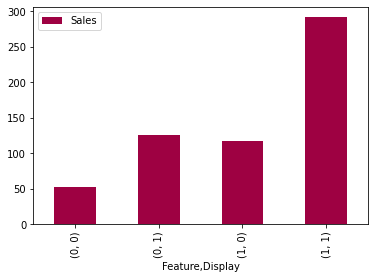

In [13]:
df.groupby(["Feature","Display"]).agg({'Sales':'mean'}).plot.bar(cmap="Spectral")

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(['Sales'], axis=1)
y= df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [15]:
#import the regressor 
from sklearn.linear_model import LinearRegression 

# create a regressor object 
regressor = LinearRegression()

# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 
y_pred= regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error,r2_score
mae =mean_absolute_error(y_test, y_pred)
print('MAE:',mae)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

MAE: 36.86264619222662
R2: 0.5013631421343403


In [16]:
import statsmodels.api as sm

In [17]:
#OLS
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train)
results=model.fit()
results.params

const                   259.924849
Price                   -51.634195
Feature                  62.839090
Display                 100.871587
Price - Competitor 1     10.037127
Price - Competitor 2     -0.086408
Price - Competitor 3      4.607235
Price - Competitor 4      7.612614
Price - Competitor 5     -3.545928
dtype: float64

In [18]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     340.6
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        14:00:25   Log-Likelihood:                -12590.
No. Observations:                2266   AIC:                         2.520e+04
Df Residuals:                    2257   BIC:                         2.525e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  259.9248 

Feature Engineering:

Interactive effect by multiplying the key features
OLS and OLS with competitors' features

In [19]:
df["Display_Features"]=df["Display"]*df["Feature"]
df["Display_Price"]=df["Display"]*df["Price"]
df["Price_Features"]=df["Price"]*df["Feature"]
df["Display_Price_Features"]=df["Display"]*df["Feature"]*df["Price"]

In [20]:
df.head()

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5,Display_Features,Display_Price,Price_Features,Display_Price_Features
0,20,5.690,0,0,4.065,4.108,5.280,4.690,3.290,0,0.0,0.0,0.0
1,26,5.968,0,0,4.065,3.775,5.247,3.946,3.490,0,0.0,0.0,0.0
2,41,6.190,0,0,4.064,3.421,5.540,3.330,3.690,0,0.0,0.0,0.0
3,34,5.780,0,0,4.066,3.510,4.500,3.973,2.172,0,0.0,0.0,0.0
4,32,6.190,0,0,4.067,3.402,5.500,2.759,3.690,0,0.0,0.0,0.0


In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(['Sales'], axis=1)
y= df['Sales']

In [22]:
X_train ,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3 , random_state= 1)

In [23]:
#OLS2
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train)
results=model.fit()
results.params

const                     151.252792
Price                     -31.778486
Feature                   125.862228
Display                   312.214286
Price - Competitor 1       10.751178
Price - Competitor 2        5.497142
Price - Competitor 3        1.690773
Price - Competitor 4        6.177187
Price - Competitor 5       -5.213858
Display_Features          802.431013
Display_Price             -47.222101
Price_Features            -15.679921
Display_Price_Features   -147.878208
dtype: float64

In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     355.5
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        14:00:51   Log-Likelihood:                -12284.
No. Observations:                2266   AIC:                         2.459e+04
Df Residuals:                    2253   BIC:                         2.467e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    151

In [25]:
df_new=df.copy()

In [26]:
df_new.drop(df.columns[[5,6,8]],axis=1,inplace=True)

In [27]:
df_new.head()

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 4,Display_Features,Display_Price,Price_Features,Display_Price_Features
0,20,5.690,0,0,4.065,4.690,0,0.0,0.0,0.0
1,26,5.968,0,0,4.065,3.946,0,0.0,0.0,0.0
2,41,6.190,0,0,4.064,3.330,0,0.0,0.0,0.0
3,34,5.780,0,0,4.066,3.973,0,0.0,0.0,0.0
4,32,6.190,0,0,4.067,2.759,0,0.0,0.0,0.0


In [28]:
X = df_new.drop(['Sales'], axis=1)
y= df_new['Sales']

In [29]:
X_train ,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3 , random_state= 1)

In [30]:
#OLS3
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train)
results=model.fit()
results.params

const                     155.987376
Price                     -30.999800
Feature                   133.495540
Display                   316.777371
Price - Competitor 1       10.794984
Price - Competitor 4        7.246985
Display_Features          796.254805
Display_Price             -47.793817
Price_Features            -16.978310
Display_Price_Features   -146.962053
dtype: float64

In [31]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     471.2
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        14:01:34   Log-Likelihood:                -12289.
No. Observations:                2266   AIC:                         2.460e+04
Df Residuals:                    2256   BIC:                         2.466e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    155

Decision Tree Regressor

In [32]:
X = df_new.drop(['Sales'], axis=1)
y= df_new['Sales']
X_train ,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3 , random_state= 1)

In [33]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object 
regressor = DecisionTreeRegressor() 

# fit the regressor with X and Y data 
model_2= regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error,r2_score
mae =mean_absolute_error(y_test, y_pred)
print('MAE:',mae)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

MAE: 38.48432784636488
R2: 0.49282267363998644


Experimenting with XGBoost and GridSearchCV to find best hypertuning parameters

In [34]:
from sklearn.model_selection import train_test_split
X = df_new.drop(['Sales'], axis=1)
y= df_new['Sales']
X_train ,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3 , random_state= 1)

In [37]:
pip install xgboost

     |████████████████████████████████| 1.2 MB 1.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV

In [37]:
#XGBoost hyper-parameter tuning
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1],\
            'max_depth': [1, 2, 3, 5],\
            'min_child_weight': [1, 3, 5,7],\
            'subsample': [0.5, 0.7, 0.9],\
            'colsample_bytree': [0.5, 0.7],\
            'n_estimators' : [400,500,600],\
            'objective': ['reg:squarederror', ]}

xgb_r = xg.XGBRegressor()

gsearch = GridSearchCV(xgb_r,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)
                     
#scoring = _'neg_mean_absolute_error', MAE
#scoring = 'neg_mean_squared_error',  #MSE
                           

modelXGB =gsearch.fit(X_train,y_train)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   57.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  8.7min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 12.8min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 18.8min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 26.2min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 35.9min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 47.5min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed: 60.5min
[Parallel(n_jobs=5)]: Done 5760 out of 5760 | elapsed: 69.4min finished


In [38]:
gsearch.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error as mae
# Print the r2 score
print(mae(y_test, gsearch.best_estimator_.predict(X_test))) 
print(r2_score(y_test, gsearch.best_estimator_.predict(X_test))) 


30.999850877518515
0.629025014686058


Without hyper parameter tuning and default values

In [41]:
from sklearn.model_selection import train_test_split
X = df_new.drop(['Sales'], axis=1)
y= df_new['Sales']
X_train ,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3 , random_state= 1)

In [42]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
xgb_r= xg.XGBRegressor( learning_rate =0.01,n_estimators=500,objective ='reg:squarederror',seed = 123)
# Fitting the model 
modelXGB= xgb_r.fit(X_train, y_train)
y_pred_xg = xgb_r.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error,r2_score
mae =mean_absolute_error(y_test, y_pred_xg)
print('MAE:',mae)
r2 = r2_score(y_test, y_pred_xg)
print('R2:', r2)

MAE: 30.048213558432497
R2: 0.6502272730606848


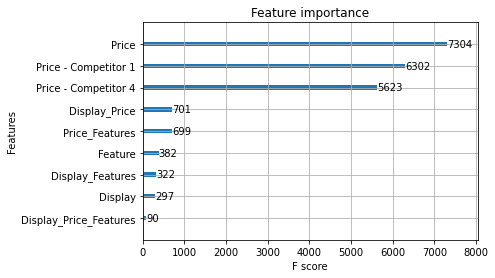

In [44]:
from xgboost import plot_importance
plot_importance(modelXGB)
plt.show()